In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn import set_config; set_config(display='diagram')

from detect_ai_content.params import *

from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextLogisticRegression import TrueNetTextLogisticRegression
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextTfidfNaiveBayesClassifier import TrueNetTextTfidfNaiveBayesClassifier
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextDecisionTreeClassifier import TrueNetTextDecisionTreeClassifier
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextSVC import TrueNetTextSVC
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextKNeighborsClassifier import TrueNetTextKNeighborsClassifier
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextUsingBERTMaskedPredictions import TrueNetTextUsingBERTMaskedPredictions

from detect_ai_content.ml_logic.preprocess import preprocess
from detect_ai_content.ml_logic.data import get_enriched_df
from detect_ai_content.ml_logic.evaluation import evaluate_model

from detect_ai_content.ml_logic.for_texts.xgboost_external import XGBoostExternal
from detect_ai_content.ml_logic.for_texts.xgboost_internal import XgBoostInternal
from detect_ai_content.ml_logic.for_texts.lgbm_internal import LgbmInternal


In [9]:
df = get_enriched_df(purpose="test")
y_test = df['generated']

# TrueNetTextTfidfNaiveBayesClassifier_model = TrueNetTextTfidfNaiveBayesClassifier()._load_model(stage="Staging")
TrueNetTextLogisticRegression_model = TrueNetTextLogisticRegression().local_trained_pipeline()
# TrueNetTextDecisionTreeClassifier_model = TrueNetTextDecisionTreeClassifier()._load_model(stage="staging")
# TrueNetTextKNeighborsClassifier_model = TrueNetTextKNeighborsClassifier()._load_model(stage="staging")
# TrueNetTextSVC_model = TrueNetTextSVC()._load_model(stage="staging")
# TrueNetTextUsingBERTMaskedPredictions_model = TrueNetTextUsingBERTMaskedPredictions()._load_model(stage="staging")

LgbmInternal_model = LgbmInternal().pretrained_model()


In [7]:
lgbm_int = LgbmInternal()
text = df.iloc[0]["text"]
print(text)
prediction, message = lgbm_int.predict(text)
print(f"Prediction: {prediction}, Message: {message}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


If you're not doing something to help you get better, you'er failing, doing something for a purpose makes you succeed in life, and inactivity does not serve a purpose to this quote. Doing something makes you accomplish more. Be the one who changes your life by doing what it takes to do something in life to reach your highest goals.

Let this quote be a inspiration of achieving and succeeding in life or at anything. You may fail a couple of times on this and that but what are you doing to not fail again? If something isn't right and want to fix it, do something about it.

In the other hand, doing something for a purpose makes you succeed in life. Thomas Jefferson once wrote "determine never to be idle... it is wonderful how much may be done if we are always doing." I strongly agree with this quote for many reasons. Inactivity is getting in the way of you not achieving and succeeding. Only you can change yourself whether you want to be successful or not.. It takes effort and hard work to

In [4]:
pipeline = LgbmInternal().pretrained_model()
predictions = pipeline.predict(df[['text']])
print(f"predictions: {predictions}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


process
text_based_features
lexical_diversity_readability
pos_tagging_features
sentiment_emotion_features
['If you\'re not doing something to help you get better, you\'er failing, doing something for a purpose makes you succeed in life, and inactivity does not serve a purpose to this quote. Doing something makes you accomplish more. Be the one who changes your life by doing what it takes to do something in life to reach your highest goals.\n\nLet this quote be a inspiration of achieving and succeeding in life or at anything. You may fail a couple of times on this and that but what are you doing to not fail again? If something isn\'t right and want to fix it, do something about it.\n\nIn the other hand, doing something for a purpose makes you succeed in life. Thomas Jefferson once wrote "determine never to be idle... it is wonderful how much may be done if we are always doing." I strongly agree with this quote for many reasons. Inactivity is getting in the way of you not achieving and s

In [5]:
print(LgbmInternal().model)


LGBMClassifier(num_leaves=50, random_state=42)


In [ ]:
dfs = xgb.get_internal_features(text=df)
dfs

NameError: name 'xgb' is not defined

In [10]:
TrueNetTextLogisticRegression_preds = TrueNetTextLogisticRegression_model.predict(df)
# TrueNetTextDecisionTreeClassifier_preds = TrueNetTextDecisionTreeClassifier_model.predict(X_test_processed)
# TrueNetTextKNeighborsClassifier_preds = TrueNetTextKNeighborsClassifier_model.predict(X_test_processed)
# TrueNetTextSVC_preds = TrueNetTextSVC_model.predict(X_test_processed)
# TrueNetTextTfidfNaiveBayesClassifier_preds = TrueNetTextTfidfNaiveBayesClassifier_model.predict(df['text'])

# X_BERT_processed = TrueNetTextUsingBERTMaskedPredictions.preprocess(data=df)
# TrueNetTextUsingBERTMaskedPredictions_preds = TrueNetTextUsingBERTMaskedPredictions_model.predict(X_BERT_processed)

LgbmInternal_preds = LgbmInternal_model.predict(df[['text']])

process
text_based_features
lexical_diversity_readability
pos_tagging_features


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


sentiment_emotion_features
['If you\'re not doing something to help you get better, you\'er failing, doing something for a purpose makes you succeed in life, and inactivity does not serve a purpose to this quote. Doing something makes you accomplish more. Be the one who changes your life by doing what it takes to do something in life to reach your highest goals.\n\nLet this quote be a inspiration of achieving and succeeding in life or at anything. You may fail a couple of times on this and that but what are you doing to not fail again? If something isn\'t right and want to fix it, do something about it.\n\nIn the other hand, doing something for a purpose makes you succeed in life. Thomas Jefferson once wrote "determine never to be idle... it is wonderful how much may be done if we are always doing." I strongly agree with this quote for many reasons. Inactivity is getting in the way of you not achieving and succeeding. Only you can change yourself whether you want to be successful or no

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_true=y_test, y_pred=TrueNetTextLogisticRegression_preds))
print(accuracy_score(y_true=y_test, y_pred=LgbmInternal_preds))


0.9421965317919075
0.9797687861271677


# class 0 is on left  
# class 1 is on the right 

In [ ]:
predictions_df = pd.DataFrame(data={
    # 'LogisticRegression':TrueNetTextLogisticRegression_preds,
    # 'DecisionTreeClassifier':TrueNetTextDecisionTreeClassifier_preds,
    # 'KNeighborsClassifier':TrueNetTextKNeighborsClassifier_preds,
    # 'SVC':TrueNetTextSVC_preds,
    # 'BERTMaskedPredictions':TrueNetTextUsingBERTMaskedPredictions_preds,
    # 'TfidfNaiveBayesClassifier': TrueNetTextTfidfNaiveBayesClassifier_preds,
    'XGB':xgb_preds,
    'y_test':y_test
})
predictions_df.head(2)

,XGB,y_test
0,0,0.0
1,1,1.0


In [ ]:
predictions_df

,XGB,y_test
0,0,0.0
1,1,1.0
2,1,1.0
3,0,0.0
4,0,0.0


In [ ]:
predictions_df['LogisticRegression_diff'] = predictions_df['LogisticRegression'] - predictions_df['y_test']
predictions_df['DecisionTreeClassifier_diff'] = predictions_df['DecisionTreeClassifier'] - predictions_df['y_test']
predictions_df['KNeighborsClassifier_diff'] = predictions_df['KNeighborsClassifier'] - predictions_df['y_test']
predictions_df['SVC_diff'] = predictions_df['SVC'] - predictions_df['y_test']
predictions_df['BERTMaskedPredictions_diff'] = predictions_df['BERTMaskedPredictions'] - predictions_df['y_test']
predictions_df['TfidfNaiveBayesClassifier_diff'] = predictions_df['TfidfNaiveBayesClassifier'] - predictions_df['y_test']

In [ ]:
predictions_df['sum_diff'] = abs(predictions_df['LogisticRegression_diff']) + abs(predictions_df['DecisionTreeClassifier_diff']) + abs(predictions_df['KNeighborsClassifier_diff']) + abs(predictions_df['SVC_diff']) + abs(predictions_df['BERTMaskedPredictions_diff']) + abs(predictions_df['TfidfNaiveBayesClassifier_diff'])

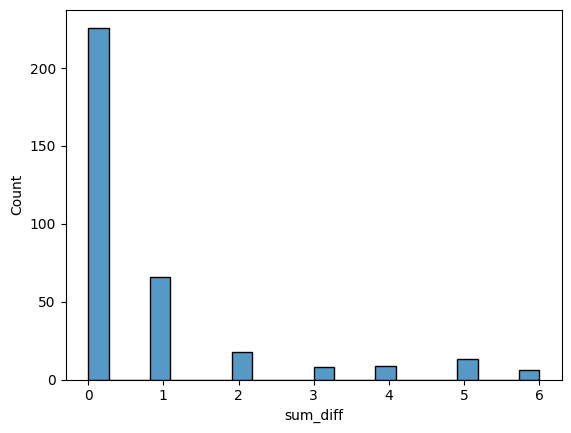

In [ ]:
sns.histplot(data=predictions_df, x='sum_diff');

In [ ]:
sum(predictions_df['sum_diff'] < 2) / predictions_df.shape[0]

0.8439306358381503

In [ ]:
predictions_df[predictions_df['sum_diff'] > 2][['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC','BERTMaskedPredictions','TfidfNaiveBayesClassifier', 'y_test', 'sum_diff']].sort_values(by=['sum_diff'], ascending=False)

,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,BERTMaskedPredictions,TfidfNaiveBayesClassifier,y_test,sum_diff
275,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
229,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
66,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
213,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
118,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
192,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
149,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
132,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
294,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
282,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
